In [1]:
# AWS libraries for Python
#!pip install awscli boto3 -U --ignore-installed six
#!pip install awscli

#!pip install boto3
!pip install pomegranate==0.11.0
!pip install PyYAML==5.1.2
!pip install pyagrum==0.18.2
#!pip install simpy
#!pip install qutip

     |████████████████████████████████| 5.2MB 5.9MB/s 
     |████████████████████████████████| 266kB 6.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44103 sha256=efda9db26dcfaa4b3d575682dec771f64c6f139aafa0d8753435f972406342cd
  Stored in directory: /root/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 4.8MB 6.1MB/s 


## Correlation Analysis: Mobility + John Hopkins

In [2]:

def plot_correlation_matrix( correlation_matrix, f_size ):
  sns.set(style='white')

  mask = np.zeros_like(correlation_matrix, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  f, ax = plt.subplots(figsize=f_size)

  cmap = sns.diverging_palette(10,220, as_cmap=True)

  ax = sns.heatmap(correlation_matrix, mask=mask, 
                  cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                  square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                  cbar_kws={'shrink': .5}, ax=ax)

  ax.set_title('Correlation between variables', fontsize=20);

In [3]:
import requests, io, json, urllib
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from itertools import cycle
from textwrap import wrap
import seaborn as sns
import altair as alt  
import numpy as np
sns.set()
%matplotlib inline
%config InlineBckend.figure_format = 'svg'

pd.set_option('display.max_rows', 1000)


- tests are not equal
- compare test data within 
- test data is meaningless


In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
from pyAgrum.lib.classifier import BNClassifier

import matplotlib.patheffects as PathEffects

import decorator
import joblib
import networkx
import numpy
import pandas
import pomegranate
import dateutil
import pytz
import scipy
import six

from scipy.stats import pearsonr

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline

# algebraic and numerical libs
import numpy as np
from sympy import *
import numpy.matlib as npm
from pylab import *

# tabular data manipulation
import pandas as pd

# visualisation libraries
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
from IPython.display import display, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib as mpl
from matplotlib import cm

import seaborn as sns
sns.set()

# bayesian networks libraries
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# quantum states libraries
#from qutip import *

# qulbit libraries
#from qlbn_core import *
#from qlbn_utils import *
#from qlbn_viz import *


#from pthrootofunity import *
#from galoisfield import *
#from fieldelement import *

# balthazar libs
#from curve import *
#from latinsquare import *
#from lbmle_mc import *
#from lbmle import *
#from mubs import *
#from striations import *
#from wignerfunction import *

#pynitefileds libs


# other aux libs
import itertools
import os

import warnings
warnings.filterwarnings("ignore")

import requests, io, json, urllib
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib 
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from itertools import cycle
from textwrap import wrap
import seaborn as sns
import altair as alt  
import numpy as np
sns.set()
%matplotlib inline
%config InlineBckend.figure_format = 'svg'

pd.set_option('display.max_rows', 1000)


# Data Analysis

### Auxiliary Functions

#### discretize_dataframe

In [6]:
def discretize_dataframe( df, class_var, num_bins=4 ):
    """Given a dataframe with continuous values, convert the continuous values into discrete ones
       by splitting the data into bins and by computing the respective quartiles
    """ 
    r=np.array(range(num_bins+1))/(1.0*num_bins)
    
    # quantiles are building using pandas.qcut
    # The "class" column is just copied.
    l=[]
    for col in df.columns.values:
        
        if col!=class_var:
            l.append( pd.DataFrame( pd.qcut( df[col],r, duplicates='drop',precision=2),columns=[col]))
        else:
            l.append( pd.DataFrame( df[col].values,columns=[col]))
    
    treated = pd.concat(l, join='outer', axis=1)
    return treated

def compute_correlation( data, f_size, title, graph_info, country ):
  # get corraltion matrix
  sns.set(style='white')

  mask = np.zeros_like(data.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  f, ax = plt.subplots(figsize=f_size)

  cmap = sns.diverging_palette(10,220, as_cmap=True)

  ax = sns.heatmap(data.corr(), mask=mask, 
                  cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':8}, 
                  square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                  cbar_kws={'shrink': .5}, ax=ax)

  ax.set_title( title , fontsize=16)
  plt.tight_layout()
  f.savefig(f"{MY_PATH}results/{country}/{country}_{graph_info}.png",dpi=300)
  

#### convert_oxford_data_series

In [7]:
def convert_oxford_data_series( df, indx ):

  # c1
  df["C1_School_closing_t0" + str(indx)].replace({"No measures": 0, 
                                       "Recommend closing": 1,
                                       "Require closing": 2,
                                       "Require closing all levels": 3}, inplace=True)
  
  # c2
  df["C2_Workplace_closing_t0" + str(indx)].replace({"No measures": 0, 
                                                    "Recommend closing": 1,
                                                    "Require closing": 2,
                                                    "Require closing all levels": 3}, inplace=True)

  # c3
  df["C3_Cancel_public_events_t0" + str(indx)].replace({"No Measures": 0, 
                                                    "Recommend cancelling": 1,
                                                    "Require cancelling": 2}, inplace=True)
  
  # c4
  df["C4_Restrictions_on_gatherings_t0" + str(indx)].replace({"No restrictions": 0, 
                                                    "Restrictions on gatherings of 10 people or less": 1,
                                                    "Restrictions on gatherings between 11-100 people": 2,
                                                    "Restrictions on gatherings between 101-1000 people": 3,
                                                    "Restrictions on very large gatherings": 4}, inplace=True)
  # c5
  df["C5_Close_public_transport_t0" + str(indx)].replace({"No Measures": 0, 
                                                    "Recommend closing": 1,
                                                    "Require closing": 2}, inplace=True)
  
  # c6
  df["C6_Stay_at_home_requirements_t0" + str(indx)].replace({"No measures": 0, 
                                                    "Recommend not leaving house": 1,
                                                    "Require not leaving house": 2,
                                                    "Require not leaving house with minimal exceptions": 3}, inplace=True)

  # c7
  df["C7_Restrictions_on_internal_movement_t0" + str(indx)].replace({"No Measures": 0, 
                                                    "Recommend not to travel": 1,
                                                    "Internal movement restrictions": 2}, inplace=True)
  
  # c8
  df["C8_International_travel_controls_t0" + str(indx)].replace({"No Measures": 0, 
                                                    "Screening arrivals": 1,
                                                    "Quarantine arrivals from some or all regions": 2,
                                                    "Ban": 3}, inplace=True)
  # E1
  df["E1_Income_support_t0" + str(indx)].replace({"No income support": 0, 
                                                    "<=50% lost income": 1,
                                                    ">50% lost income": 2}, inplace=True)  

  # E2
  df["E2_Debt/contract_relief_t0" + str(indx)].replace({"None": 0, 
                                                    "Narrow": 1,
                                                    "Broad": 2}, inplace=True)  



  # H1
  df["H1_Public_information_campaigns_t0" + str(indx)].replace({"None": 0, 
                                                    "Public officials urging caution about Covid-19": 1,
                                                    "Coordinated public campaign": 2}, inplace=True)  

  # H2
  df["H2_Testing_policy_t0" + str(indx)].replace({"None": 0, 
                                                  "Symptomatic & eligible": 1,
                                                   "Testing of anyone showing Covid-19 symptoms": 2,
                                                    "Open public testing": 3}, inplace=True)  

  # H3
  df["H3_Contact_tracing_t0" + str(indx)].replace({"None": 0, 
                                                    "Recommended": 1,
                                                    "Comprehensive": 2}, inplace=True)  
  
  # H6
  df["H6_Facial_Coverings_t0" + str(indx)].replace({"No policy": 0, 
                                                    "Required in some specified spaces": 1,
                                                    "Required in all public spaces": 2,
                                                    "Required outside the home at all times": 3,
                                                    "Required at all times outside the home": 3}, inplace=True)  
  
  # H6
  df["Weekday_t0" + str(indx)].replace({"Monday": 2, 
                                                    "Tuesday": 3,
                                                    "Wednesday": 4,
                                                    "Thursday": 5,
                                                    "Friday": 6,
                                                    "Saturday":7,
                                                    "Sunday":1}, inplace=True) 


  return df



#### convert_oxford_data

In [8]:
def convert_oxford_data( df ):

  # c1
  df["C1_School_closing"].replace({"No measures": 0, 
                                       "Recommend closing": 1,
                                       "Require closing (some levels)": 2,
                                       "Require closing (all levels)": 3}, inplace=True)
  
  # c2
  df["C2_Workplace_closing"].replace({"No measures": 0, 
                                                    "Recommend closing": 1,
                                                    "Require closing some sectors": 2,
                                                     "Require closing (all levels)" : 3,
                                                    "Require closing all but essential": 3}, inplace=True)

  # c3
  df["C3_Cancel_public_events" ].replace({"No Measures": 0, 
                                          "No measures": 0,
                                          "Recommend closing":1,
                                                    "Recommend": 1,
                                          "Require closing (some levels)":2,
                                                    "Required": 2,
                                          "Require closing (all levels)":3
                                          }, inplace=True)

  # c4
  df["C4_Restrictions_on_gatherings" ].replace({"No restrictions": 0, 
                                                    "Restrictions on gatherings of fewer than 10 people": 1,
                                                    "Restrictions on gatherings of 11-100 people": 2,
                                                    "Restrictions on gatherings of 101-1000 people": 3,
                                                    "Restrictions on very large gatherings": 4}, inplace=True)
  

  # c5
  df["C5_Close_public_transport" ].replace({"No Measures": 0, 
                                                    "Recommended": 1,
                                                    "Required": 2}, inplace=True)
  
  # c6
  df["C6_Stay_at_home_requirements" ].replace({"No measures": 0, 
                                                    "Recommend staying home": 1,
                                                    "Required staying home": 2,
                                                    "Required with exceptions": 3}, inplace=True)

  # c7
  df["C7_Restrictions_on_internal_movement" ].replace({"No Measures": 0, 
                                                    "Recommended": 1,
                                                    "Required": 2,
                                                    "Internal movement restrictions": 3}, inplace=True)
  
  # c8
  df["C8_International_travel_controls" ].replace({"No Measures": 0, 
                                                    "Screening arrivals": 1,
                                                    "Quarantine arrivals from some or all regions": 2,
                                                    "Ban": 3}, inplace=True)
  # E1
  df["E1_Income_support" ].replace({"No income support": 0, 
                                                    "<50% lost income": 1,
                                                    "<=50% lost income": 1,
                                                    ">50% lost income": 2}, inplace=True)  

  # E2
  df["E2_Debt/contract_relief" ].replace({"None": 0, 
                                                    "Narrow": 1,
                                                    "Broad": 2}, inplace=True)  

  # H2
  df["H2_Testing_policy" ].replace({"None": 0, 
                                                  "Symptomatic & eligible": 1,
                                                   "Anyone symptomatic": 2,
                                                    "Generally available": 3}, inplace=True)  

  # H3
  df["H3_Contact_tracing" ].replace({"None": 0, 
                                     "No contact tracing" : 0,
                                                    "Limited": 1,
                                                    "Comprehensive": 2}, inplace=True)  
  
  # H6
  df["H6_Facial_Coverings" ].replace({"No policy": 0, 
                                                    "Required in some specified spaces": 1,
                                                    "Required in some public spaces": 1,
                                                    "Required in all public spaces": 2,
                                                    "Required at all times outside the house" : 3,
                                                    "Required at all times outside the home": 3}, inplace=True)  
  
  # H6
  #df["Weekday"].replace({"Monday": 2, 
  #                                                  "Tuesday": 3,
  #                                                  "Wednesday": 4,
  #                                                  "Thursday": 5,
  #                                                  "Friday": 6,
  #                                                  "Saturday":7,
  #                                                  "Sunday":1}, inplace=True) 


  return df

#### get_data_per_day

In [9]:
MY_PATH = "/content/drive/My Drive/Colab Notebooks/AI/modelling_data/QLBN/"

MILLION = 1000000

def get_data_per_day( cum_data ):
    
    cases_per_day = [0]  # list to return. Initially there are 0 cases
    
    # for each data point... 
    # subtract the following day cases with the current cases
    for i in range( 0, len(cum_data)-1):
        
        current_day =  cum_data[i]  # current data
        next_day = cum_data[i+1]    # following day data
        cases_per_day.append( np.abs(next_day - current_day) ) # add data to result list
    
    return cases_per_day

#### get_day_week_from_date

In [10]:
def get_day_week_from_date( dates ):

  day_of_week = []
  for date in dates:
    timest =  pd.Timestamp(date)
    day_of_week.append( timest.day_name() )

  return day_of_week

#### get_flu_season

In [11]:
def get_flu_season_info(dates):

  isFlu = []
  for date in dates:
    timest =  pd.Timestamp(date)
    if( (timest.month >= 10) and (timest.month <= 12) ):
      isFlu.append( True )
    else:
      if( (timest.month >= 1) and (timest.month <= 4) ):
        isFlu.append( True )
      else:
        isFlu.append( False )
  return isFlu

#### data_per_unit

In [12]:
def data_per_unit( data, population, UNIT ):
    
    data_per_million = []
    for data_per_day in get_data_per_day( data ):
        val = (data_per_day*UNIT)/population
        data_per_million.append(val)
        
    return data_per_million

#### getJHData

In [13]:
def getJHData( country, population, start_date, end_date ='' ):

  url_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
  url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

  data_cases = pd.read_csv(url_cases)
  data_deaths = pd.read_csv(url_deaths)

  country_cases = data_cases[ data_cases['Country/Region'] == country]
  country_deaths = data_deaths[ data_cases['Country/Region'] == country]

  lst = data_cases.columns.to_list()
  indx_start = lst.index(start_date)

  indx_end = -1
  if( len(end_date) > 3):
    indx_end = lst.index(end_date)

  dates = lst[indx_start:indx_end+1]

  country_cases = country_cases.groupby(['Country/Region']).sum()
  country_deaths = country_deaths.groupby(['Country/Region']).sum()

  cases = country_cases[dates].values[0]
  deaths = country_deaths[dates].values[0]

  analysis = pd.DataFrame()
  analysis['Dates'] = dates
  analysis['Cases'] = cases
  analysis['Cases_per_Million'] = data_per_unit( cases, population, MILLION )
  analysis['Cases_per_Day'] = get_data_per_day( cases )
  analysis['Deaths'] = deaths
  analysis['Deaths_per_Million'] = data_per_unit( deaths, population, MILLION )
  analysis['Deaths_per_Day'] = get_data_per_day( deaths )
  analysis['Day_of_Week'] = get_day_week_from_date( dates )
  analysis['isFluSeason'] = get_flu_season_info( dates )
  return analysis




#### plotJHData

In [14]:
def plot_JHData( df, x, y1, y2, country, graph_type, discard_weekends = True, step = 7 ):

  sns.set()

  # setting fontsize of figure to 22
  plt.rcParams.update({'font.size': 40})

  # initialise figure
  fig = plt.figure(figsize=(15,7))

  temp = df
  # discard weekends from analysis
  if( discard_weekends ):
    temp = temp[ (temp['Day_of_Week' ] != 'Saturday') ]
    temp = temp[  (temp['Day_of_Week' ] != 'Sunday') ]

  plt.subplot(1, 2, 1)
  if( graph_type == 'Cummulative'):
    #plt.plot(temp[x], np.log(temp[y1]), color='black')
    plt.plot(temp[x], temp[y1], color='black')
  else:  
    plt.bar(temp[x], temp[y1], color='black')

  plt.title(graph_type + ' Confirmed covid-19 cases in ' + country)
  plt.ylabel('Number of confirmed covid-19 cases ' + graph_type)
  plt.xticks(ticks= range(0, len(temp['Dates']), step), rotation=90)
  plt.tight_layout()

  # plot confirmed deaths
  plt.subplot(1, 2, 2)
  if( graph_type == 'Cummulative'):
    #plt.plot(temp[x], np.log(temp[y2]), color='red')
    plt.plot(temp[x], temp[y2], color='red')
  else:  
    plt.bar(temp[x], temp[y2], color='red')
 
  plt.title(graph_type +  ' Confirmed covid-19 deaths in ' + country)
  plt.ylabel('Number of confirmed covid-19 deaths ' + graph_type)
  plt.xticks(ticks= range(0, len(temp['Dates']), step), rotation=90) 
  plt.tight_layout()
  plt.savefig(f"{MY_PATH}results/{country}/{country}_{graph_type}_JH.png",dpi=300)

  plt.show()

#### get_oxford_data

In [15]:
def get_oxford_data(country_iso3, start_date, end_date = ""):
  #Data range

  if( len(end_date) < 3):
    end_dt = datetime.today()
  else:
    end_dt = end_date

  date_list = pd.date_range(start=start_date, end=end_dt).tolist()

  # get the right date format and convert to a string
  date_list = [date.strftime("%Y-%m-%d") for date in date_list]

  # total number of days
  n = len(date_list)
  print("Total days passed since %s: %d\n" %(start_date, n))

  urls = [f"https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/{country_iso3}/{date}" for date in date_list]

  # Submit requests
  dfs = [None for _ in range(0,n)]
  for i in range(0,n):
      r = urllib.request.urlopen(urls[i])
      data = json.loads(r.read().decode("utf-8"))
      dfs[i] = pd.DataFrame(data['policyActions'])
      dfs[i]["Date"] = date_list[i]
      
  # Collapse into one dataframe
  df = pd.concat(dfs, axis=0)

  # Add field to store policy code category (e.g. C, E, H)
  df["policy_category"] = df["policy_type_code"].str[0]

  # Convert to datetime and numeric
  df["Date"] = pd.to_datetime(df["Date"])
  df["policyvalue"] = pd.to_numeric(df["policyvalue"].str.replace(",",""))

  return df

#### merge_oxford_data

In [16]:
def merge_oxford_data( oxford_data, data, codes ):

  df_subset = oxford_data[oxford_data["policy_type_code"].isin(codes)]

  df_subset = df_subset.filter(["Date", "policy_type_code", "policy_type_display", "policy_value_display_field"])

  policies = []
  codes = df_subset["policy_type_code"].values
  descr = df_subset["policy_type_display"].values

  for i in range(0, len(descr)):
    policy = codes[i] + "_" + descr[i].replace(" ", "_")
    policies.append(policy)
    
  df_subset["policy"] = policies

  for code in list(dict.fromkeys(codes)):
    policy_name_df = df_subset[ df_subset["policy_type_code"] == code ]
    policy_name = list(dict.fromkeys( policy_name_df["policy"].values))[0]

    # fix size of dataframe
    temp = df_subset[ df_subset["policy_type_code"] == code ]
    last_rows = temp.tail(14)
    if( code == "C2"):
      last_rows = temp.tail(13)
    df = pd.concat([last_rows, temp], ignore_index=True)

    data[policy_name] = df["policy_value_display_field"].values
    return data

#### plot_oxford_data

In [17]:
def plot_oxford_data(country_iso3, desired_codes, start_date, end_date = "" ):

  sns.set()
  df = get_oxford_data(country_iso3, start_date, end_date)

  plt.rcParams.update({'font.size': 12})

  # Reduce subset to desired category
  df_subset = df[df["policy_type_code"].isin(desired_codes)]

  # Get unique policy types per category
  policy_codes = df_subset["policy_type_code"].unique()
  policy_types = df_subset["policy_type_display"].unique()
  policy_dict = dict.fromkeys(policy_codes)  

  for policy_code, policy_type in zip(policy_codes,policy_types):

    # Get values
    df_policy = df_subset[df_subset["policy_type_code"]==policy_code]
    values = df_policy["policyvalue_actual"].unique()
    names = df_policy["policy_value_display_field"].unique()
    value_dict = {value : name for value, name in zip(values,names)}
    # Arrange dictionary
    policy_dict[policy_code] = {
        "type" : policy_type,
        "values" : value_dict}  
      
  # Create time-series plot for catgory
  nrow, ncol = 4, 3
  colors = map('C{}'.format, cycle(range(nrow*ncol)))
  fig, axs = plt.subplots(nrow,ncol,figsize=(ncol*5,nrow*2.5))
  for policy_code,ax in zip(policy_codes,axs.flatten()):

      # Plot data
      df_subsubset = df_subset[df_subset["policy_type_code"] == policy_code]
      df_subsubset.plot(x="Date",y="policyvalue_actual",ax=ax,marker='o',markevery=14,alpha=0.4,color=next(colors))

      # Format dates
      date_form = mdates.DateFormatter("%m/%d")
      ax.xaxis.set_major_formatter(date_form)
      ax.xaxis.set_major_locator(mdates.DayLocator(interval=28))
      ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))
      ax.set(xlabel=None)

      # Add y axis labels 
      ax.yaxis.set_ticks(list(policy_dict[policy_code]["values"].keys()))
      labels = list(policy_dict[policy_code]["values"].values())
      labels_wrap = [ '\n'.join(wrap(l, 17)) for l in labels ]
      ax.yaxis.set_ticklabels(labels_wrap, fontsize="x-small")

      # Add or remove other labels
      ax.set(ylim=(-.05,4))
      ax.get_legend().remove()
      ax.set_title(policy_dict[policy_code]["type"],fontsize="small")

  fig.autofmt_xdate()
  plt.figtext(0.99, 0.005, f"Data as of {datetime.today().strftime('%m-%d-%Y')} per the Oxford Covid-19 Government Response Tracker (OxCGRT)", ha='right', fontsize="xx-small",color="dimgray") 
  plt.tight_layout()
  plt.savefig(f"{MY_PATH}results/{country_iso3}_OxCGRT.png",dpi=300)
  plt.show()

#### get_google_mobility_data

In [18]:
# gogle mobility
def get_google_mobility_data( country, end_date ):
  #  Google Mobility Data
  g_data_url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
  g_data = pd.read_csv(g_data_url, index_col=False)

  mask = (g_data.date <= end_date)
  g_data = g_data.loc[mask]

  g_data.drop(["country_region_code", "metro_area", "iso_3166_2_code", "census_fips_code"], axis=1, inplace=True)



  g_data_country = g_data[ g_data.country_region == country]
  g_data_country.rename( columns = {'retail_and_recreation_percent_change_from_baseline':'G_Retail',
                                'grocery_and_pharmacy_percent_change_from_baseline' : 'G_Grocery_Pharmacy',
                                'parks_percent_change_from_baseline' : 'G_Parks',
                                'transit_stations_percent_change_from_baseline' : 'G_Transit',
                                'workplaces_percent_change_from_baseline' : 'G_Workplace',
                                'residential_percent_change_from_baseline' : 'G_Residencial'}, inplace = True)

  g_data_country.drop(["country_region"], axis=1, inplace = True)
  g_data_country = g_data_country.dropna()
  g_data_country = g_data_country.groupby(['date']).mean()

  return g_data_country

#### plot_google_mobility_data

In [19]:
def pct_change(a,b):
  return abs((float(b)-float(a))/float(a) * 100.0)

# plot google mobibility
def plot_google_mob_data(country, items, data, month, mobility):

  sns.set()
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))

  for i, item in enumerate(items):
    
    min = data[item].rolling(window=7).mean().min()
    min_point_txt = "{:.0f}".format(min)
    date_of_min_value = data[item].rolling(window=7).mean().idxmin()

    date_of_current_value  = data[item].loc[~data[item].isnull()].rolling(window=7).mean().index.max()
    current_value = data[item].loc[~data[item].isnull()].rolling(window=7).mean().tail(1).values[0]
    current_point_txt = "{:.0f}".format(current_value)

    percentage_change = "{:.0f}%".format(pct_change(min, current_value))

    data[item].rolling(window=7).mean().plot(legend=False, color="#e4d8cf", linewidth=0.7, zorder=0, alpha=1, ax=ax[i])
    data[item].rolling(window=7).mean().plot(legend=False, color="#33cad5", linewidth=3, zorder=1, alpha=1, ax=ax[i], path_effects=[PathEffects.withStroke(linewidth=5, foreground='w')] )

    # Let's use this style to all texts inside the plot
    text_path_effects = [PathEffects.withStroke(linewidth=4, foreground='w')]
    
    # PLOT MINIMUM AND CURRENT POINTS OVER THE OTHER LINE PLOT
    markers_on_x = [date_of_min_value, date_of_current_value]
    markers_on_y = [min, current_value]
    ax[i].plot(markers_on_x, markers_on_y, 'o', markerfacecolor='#06579e', markersize=12, markeredgecolor="white", markeredgewidth=2 )

    # GREY LINE POINTING TO MINIMUM VALUE
    ax[i].annotate("",
              xy=(date_of_min_value, min), xycoords='data',
              xytext=(date_of_current_value, min), textcoords='data',
              arrowprops=dict(arrowstyle="-",
                              linestyle="--",
                              linewidth=1,
                              color="grey"),
              )

    # MINIMUM VALUE TEXT OVER POINT
    ax[i].annotate(min_point_txt, xy=(date_of_min_value, min), xycoords="data", ha="right",  xytext=(-5, -10), textcoords='offset points', size=12, path_effects=text_path_effects)

    # RED LINE POINTING TO CURRENT VALUE
    ax[i].annotate("",
              xy=(date_of_current_value, current_value), xycoords='data',
              xytext=(date_of_current_value, min), textcoords='data',
              arrowprops=dict(arrowstyle="->",
                              linestyle="--",
                              linewidth=1,
                              color="red"),
              )
    # CURRENT VALUE TEXT OVER POINT
    ax[i].annotate(current_point_txt, xy=(date_of_current_value, current_value), xycoords="data", ha="right", xytext=(-3, 10), textcoords='offset points', size=12, path_effects=text_path_effects )


    # DRAW TEXT SHOWING PERCENTAGE CHANGE BETWEEN MINIMUM AND CURRENT
    ax[i].annotate(percentage_change, xy=(date_of_current_value, min), xycoords="data", ha="right", xytext=(-4, 10), textcoords='offset points', size=12, color="red", path_effects=[PathEffects.withStroke(linewidth=.2, foreground='red')] )

    # We'll align the state name to the top right part of the plot.
    ax[i].set_title(country + ": " + item, fontsize=12, ha='right', pad=5)

    # We don't want any grid
    ax[i].xaxis.grid(False)
    # nor x label
    ax[i].set_xlabel("")

    # For the x tickks, let's just use Mar and Sep
    ax[i].set_xticklabels(["Feb", "","","","","", month])

    ax[i].xaxis.set_tick_params(labelsize=10)
    ax[i].yaxis.set_tick_params(labelsize=10)

    # Now let's change our background colors to the ones used on Financial Times
    background_color = '#fff3e5'

    ax[i].set_facecolor(background_color)

    ax[i].spines['bottom'].set_alpha(0)
    ax[i].spines['top'].set_alpha(0)
    ax[i].spines['left'].set_alpha(0)
    ax[i].spines['right'].set_alpha(0)

    fig.patch.set_facecolor(background_color)
    fig.patch.set_alpha(1)

    fig.patch.set_edgecolor(background_color)
    fig.patch.set_linewidth(1)
    
    # For layout purposes, we just want the ysticks at the start and end of the plots.
    if (i==0) or (i==3):
      ax[i].yaxis.tick_right()
    else:
      ax[i].set_yticklabels([])
  #plt.tight_layout()
  plt.savefig(MY_PATH + "results/" + country + "/"+country+"_G_" + mobility, dpi=300)
  plt.show()

## Germany


### Stringency Analysis

Total days passed since 2020-02-14: 279



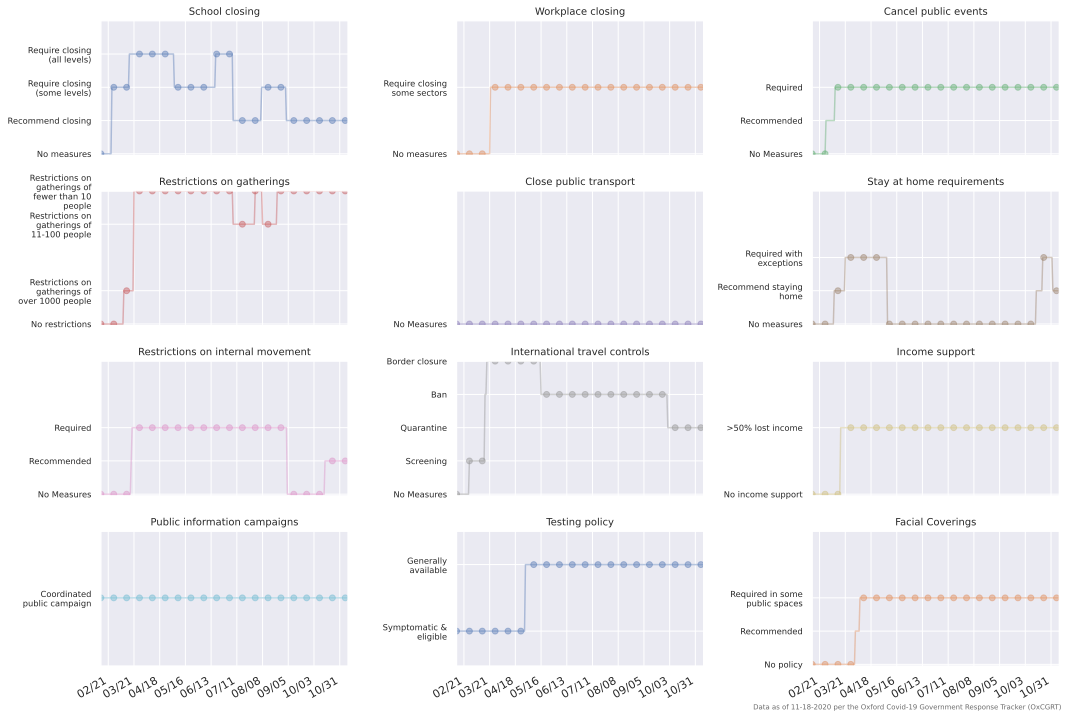

In [20]:
iso_code = 'DEU'
plot_oxford_data(iso_code, ["C1","C2", "C3", "C4", "C5","C6","C7","C8", "H1", "H2", "H6", "E1"], '2020-02-14' )


### Daily Cases / Deaths Analysis

In [26]:
country = 'Germany'
population = 83.02*MILLION

data_SWE = getJHData( country, population, '2/15/20', end_date='11/10/20' )
data_SWE.head(10)

,Dates,Cases,Cases_per_Million,Cases_per_Day,Deaths,Deaths_per_Million,Deaths_per_Day,Day_of_Week,isFluSeason
0,2/15/20,16,0.0,0,0,0.0,0,Saturday,True
1,2/16/20,16,0.0,0,0,0.0,0,Sunday,True
2,2/17/20,16,0.0,0,0,0.0,0,Monday,True
3,2/18/20,16,0.0,0,0,0.0,0,Tuesday,True
4,2/19/20,16,0.0,0,0,0.0,0,Wednesday,True
5,2/20/20,16,0.0,0,0,0.0,0,Thursday,True
6,2/21/20,16,0.0,0,0,0.0,0,Friday,True
7,2/22/20,16,0.0,0,0,0.0,0,Saturday,True
8,2/23/20,16,0.0,0,0,0.0,0,Sunday,True
9,2/24/20,16,0.0,0,0,0.0,0,Monday,True


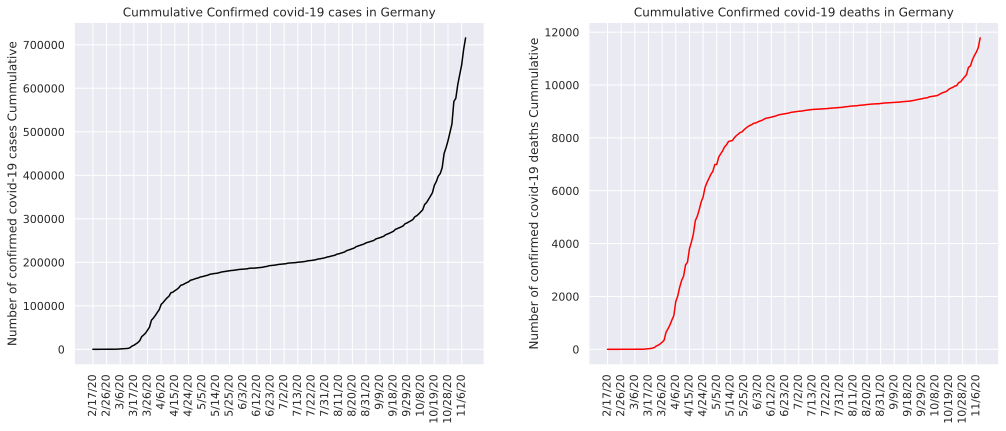

In [27]:
plot_JHData( data_SWE, 'Dates', 'Cases', 'Deaths', country, 'Cummulative', discard_weekends = True, step = 7 )


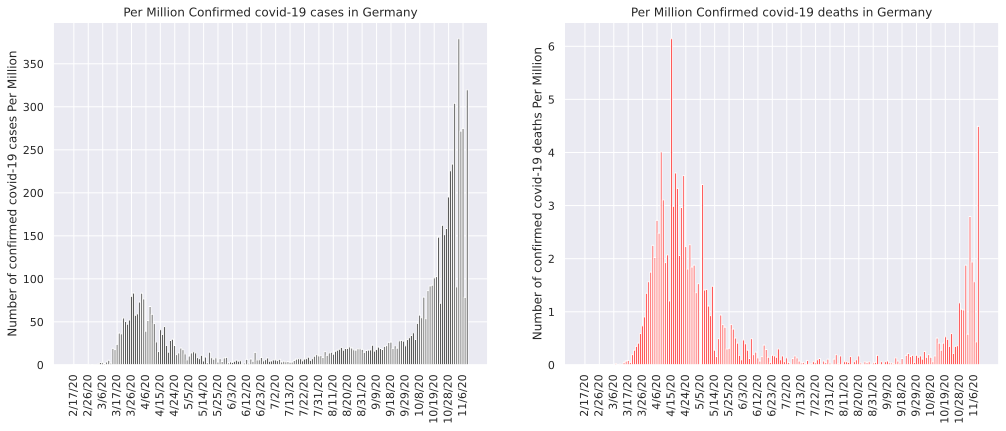

In [28]:
plot_JHData( data_SWE, 'Dates', 'Cases_per_Million', 'Deaths_per_Million', country, 'Per Million', discard_weekends = True, step = 7 )


### Google Mobility Analysis

In [29]:
# no google mobility data
g_data_SWE = get_google_mobility_data( country, end_date='2020-11-10' )
g_data_SWE.tail()

,G_Retail,G_Grocery_Pharmacy,G_Parks,G_Transit,G_Workplace,G_Residencial
date,,,,,,


In [ ]:
for col in g_data_SWE.columns.to_list():
  data_SWE[col] = g_data_SWE[col].values.tolist()
data_SWE.head(10)

In [ ]:
data_SWE.tail(10)

In [ ]:
# overall
items = ["G_Retail", "G_Grocery_Pharmacy",	"G_Parks"]
plot_google_mob_data(country, items, data_SWE, "Nov", "Retail_Grocery_Pharmacy_Parks" )
items = ["G_Transit",	"G_Workplace", "G_Residencial"]
plot_google_mob_data(country, items, data_SWE, "Nov", "Transit_Workplace_Residencial" )

### How are Pople Reacting Based on Daily Information?

In [ ]:
# how are people reacting based on daily information
MONTHS = ["","JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"]

for i in range(3,12):
  correlation_per_day = data_SWE.filter(["Dates", "Cases_per_Day", "Deaths_per_Day","G_Retail",	
                                         "G_Grocery_Pharmacy",	"G_Parks", "G_Transit",	"G_Workplace",	"G_Residencial" ])
  
  compute_correlation( correlation_per_day[ pd.to_datetime(correlation_per_day.Dates).dt.month == i], (7,7), 
                      "People's Behavioral Response to Daily Data in " + MONTHS[i] + " in " + country, country + "_" + MONTHS[i], country )


In [ ]:
4# add stringency data
oxford_data_SWE = get_oxford_data(iso_code, "2020-02-15", end_date = "2020-11-10")
oxford_data_SWE.head(10)

In [ ]:
codes = ["C1","C2", "C3", "C4", "C5","C6","C7","C8", "H2", "H3", "H6", "E1", "E2"]

df_subset = oxford_data_SWE[oxford_data_SWE["policy_type_code"].isin(codes)]

df_subset = df_subset.filter(["Date", "policy_type_code", "policy_type_display", "policy_value_display_field"])

policies = []
codes2 = df_subset["policy_type_code"].values
descr = df_subset["policy_type_display"].values

for i in range(0, len(descr)):
  policy = codes2[i] + "_" + descr[i].replace(" ", "_")
  policies.append(policy)
  
df_subset["policy"] = policies

for code in list(dict.fromkeys(codes)):
  policy_name_df = df_subset[ df_subset["policy_type_code"] == code ]
  policy_name = list(dict.fromkeys( policy_name_df["policy"].values))[0]


  # fix size of dataframe
  temp = df_subset[ df_subset["policy_type_code"] == code ]

  df = pd.DataFrame()
  df = temp.copy()
  if( temp.shape[0] < 270 ):
    val =  270 - temp.shape[0]
    last_rows = temp.tail(val)
    df = pd.concat([last_rows, temp], ignore_index=True)
  
  if( temp.shape[0] > 270 ):
    df = df[:-1*(temp.shape[0]-270)] 

  data_SWE[policy_name] = df["policy_value_display_field"].values

data_analysis_SWE = convert_oxford_data( data_SWE )

In [ ]:
codes2 = ["C1_School_closing",
"C2_Workplace_closing",
"C3_Cancel_public_events",
"C4_Restrictions_on_gatherings",
"C5_Close_public_transport",
"C6_Stay_at_home_requirements",
"C7_Restrictions_on_internal_movement",
"C8_International_travel_controls",
"E1_Income_support",
"E2_Debt/contract_relief",
"H2_Testing_policy",
'H3_Contact_tracing',
"H6_Facial_Coverings"]

#data.drop(codes2, inplace=True, axis=1)

#### Correlation with C policy types

In [ ]:
correlation_per_day_SWE = data_analysis_SWE.filter(["Dates", "isFluSeason", "Cases_per_Day", "Deaths_per_Day", 
                                    "C1_School_closing", "C2_Workplace_closing", "C3_Cancel_public_events", "C4_Restrictions_on_gatherings",
                                   "C5_Close_public_transport", "C6_Stay_at_home_requirements", "C7_Restrictions_on_internal_movement", "C8_International_travel_controls" ])
compute_correlation( correlation_per_day_SWE, (10,10), "Correlation Between C-Level Policies and Daily Cases/Deaths in " + country, "c_level" + "_" + country,country)


#### Correlation with H-Level Policies

In [ ]:
correlation_per_day_SWE = data_analysis_SWE.filter(["Dates", "isFluSeason", "Cases_per_Day", "Deaths_per_Day", 
                                    "H2_Testing_policy", "H3_Contact_tracing", "H6_Facial_Coverings"  ])
compute_correlation( correlation_per_day_SWE, (10,10), "Correlation Between H-Level Policies and Daily Cases/Deaths in " + country, "h_level" + "_" + country,country)


#### Correlation Between C+H Policies

In [ ]:
correlation_per_day_SWE = data_analysis_SWE.filter(["Dates", "isFluSeason", "Cases_per_Day", "Deaths_per_Day", 
                                   "H2_Testing_policy", "H3_Contact_tracing", 
                                    "C1_School_closing", "C2_Workplace_closing", "C3_Cancel_public_events", "C4_Restrictions_on_gatherings",
                                   "C5_Close_public_transport", "C6_Stay_at_home_requirements", "C7_Restrictions_on_internal_movement", "C8_International_travel_controls" ])
compute_correlation( correlation_per_day_SWE, (10,10), "Correlation Between C-Level and H-Level  Policies and Daily Cases/Deaths in " + country, "c_h_level" + "_" + country,country)


In [ ]:

correlation_per_day_SWE = data_analysis_SWE.filter(["Dates", "isFluSeason", "Cases_per_Day", "Deaths_per_Day","G_Retail", "H2_Testing_policy", "H3_Contact_tracing",
                                        "C1_School_closing", "C2_Workplace_closing", "C3_Cancel_public_events", "C4_Restrictions_on_gatherings",
                                        "C5_Close_public_transport", "C6_Stay_at_home_requirements", "C7_Restrictions_on_internal_movement", "C8_International_travel_controls",
                                        "G_Grocery_Pharmacy",	"G_Parks", "G_Transit",	"G_Workplace",	"G_Residencial" ])
compute_correlation( correlation_per_day_SWE, (12,12), "People's Behavioral Response to Daily Data in " + country, "all" + "_" + country,country)



### Bayesian Network Analysis

In [ ]:

def bin_info( df, discretizer, columns ):
  v = []
  vars = columns
  
  f_val = []
  for i in range(0, len(discretizer.bin_edges_)):
    bins = discretizer.bin_edges_[i]

    for j in range(0, len(bins)-1):
      value =  "L" + str(np.round(bins[j], 2)) + "__" + str(np.round(bins[j+1], 2)) + "L"
      value = value.replace(".", "_")
      value = value.replace("-", "_")
      v.append( value )
      df[vars[i]].replace({j : value}, inplace=True)
      if( (vars[i] == "Cases_per_Million") or (vars[i] == "Deaths_per_Million")):
        f_val.append( value )

  return df,f_val



In [ ]:
MONTHS = ["","JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"]

inferences =[]
bns = []
inf_cases = []
inf_deaths = []
for i in range(3,11):
  time_splice = data_analysis_SWE[ pd.to_datetime(data_analysis_SWE.Dates).dt.month == i ]


In [ ]:
# discretize data
from sklearn.preprocessing import KBinsDiscretizer

def prepare_bn_data( df, cont_columns, ordinal_columns, var ):

  df_cont = df.filter(cont_columns)
  df_ord  = df.filter(ordinal_columns)

  discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
  df_converted = pd.DataFrame(discretizer.fit_transform(df_cont), columns = df_cont.columns.to_list() )
  
  if( len(ordinal_columns) > 0):
    df_final = pd.concat([df_converted, df_ord], axis=1, ignore_index=False )
  else:
    df_final = df_converted

  path_bn = MY_PATH + "results/" + country + "/nets/" + country + '.csv'.replace(".csv", "_" + var + ".csv")
  print(path_bn)

  df_final_test = df_final[191:-1]  # testset

  df_final,f_val = bin_info( df_final, discretizer, df_cont.columns.to_list() )
  df_final_test,f_val = bin_info( df_final_test, discretizer, df_cont.columns.to_list() )

  df_final.to_csv(path_bn, index=False)
  df_final_test.to_csv(path_bn.replace(".csv", "_test.csv"), index=False)

  return path_bn, f_val


def learn_net_gen( bn_path, f_val, caption ):
  learner = gum.BNLearner( bn_path )
  learner.useLocalSearchWithTabuList()
  bn = learner.learnBN()

  inference = gnb.getInference(bn, evs={}, size='12')
  inference_cases = gnb.getInference(bn, evs={"Cases_per_Million" : f_val[4]}, size='12')
  inference_deaths = gnb.getInference(bn, evs={"Deaths_per_Million" : f_val[9]}, size='12')

  # leaned Bayesian Network training set
  gnb.sideBySide(*[bn, gnb.getInformation(bn), inference, inference_cases, inference_deaths  ], captions=[ "BN"+" " + caption, "Information"+" " + caption, "Inference"+" " + caption, "Daily Cases Change"+" " + caption, "Daily Deaths Change"+" " + caption ])

  # save network to file
  gum.saveBN(bn, bn_path.replace(".csv", ".net"))
  return bn



def learn_net( bn_path, f_val, var, order ):
  learner = gum.BNLearner( bn_path )
  learner.useLocalSearchWithTabuList()
  learner.addMandatoryArc(order[0],order[1])
  bn = learner.learnBN()

  inference = gnb.getInference(bn, evs={}, size='12')
  inference_cases = gnb.getInference(bn, evs={var : f_val}, size='12')
  
  # leaned Bayesian Network training set
  gnb.sideBySide(*[bn, inference, inference_cases  ], captions=[ "BN", "Inference", "Daily Cases Change" ])

  # save network to file
  gum.saveBN(bn, bn_path.replace(".csv", ".net"))
  return bn


In [ ]:
real_cols = ["Cases_per_Million", "Deaths_per_Million", "G_Retail",
                "G_Grocery_Pharmacy",	"G_Parks", "G_Transit",	
                "G_Workplace",	"G_Residencial" ]

ordinal_cols = ["H2_Testing_policy", "H3_Contact_tracing", "H6_Facial_Coverings",
             "C1_School_closing", "C2_Workplace_closing", "C4_Restrictions_on_gatherings",
              "C6_Stay_at_home_requirements" ]

ordinal_cols_b = ["H2_Testing_policy", "H3_Contact_tracing", "H6_Facial_Coverings",
             "C1_School_closing", "C2_Workplace_closing", "C3_Cancel_public_events", "C4_Restrictions_on_gatherings",
             "C5_Close_public_transport", "C6_Stay_at_home_requirements", "C7_Restrictions_on_internal_movement", 
             "C8_International_travel_controls" ]

files = []
bn_path, f_val = prepare_bn_data( data_analysis_SWE, real_cols, ordinal_cols, "all" )
files.append(bn_path)

bn = learn_net_gen(bn_path, f_val, "")


In [ ]:
real_cols = ["Cases_per_Million", "Deaths_per_Million", "G_Retail",
                "G_Grocery_Pharmacy",	"G_Parks", "G_Transit",	
                "G_Workplace",	"G_Residencial" ]

files = []
bn_path, f_val = prepare_bn_data( data_analysis_SWE, real_cols, [], "g_data" )
files.append(bn_path)

bn = learn_net_gen(bn_path, f_val, "")


In [ ]:

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Cases_per_Million"], ["C6_Stay_at_home_requirements"], "C6_Cases" )
files.append(bn_path)
print(f_val)
learn_net(bn_path, f_val[4], "Cases_per_Million", ["Cases_per_Million", "C6_Stay_at_home_requirements"])

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Cases_per_Million"], ["H2_Testing_policy"], "H2_Cases" )
files.append(bn_path)
learn_net(bn_path, f_val[4], "Cases_per_Million", ["Cases_per_Million", "H2_Testing_policy"])

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Cases_per_Million"], ["H6_Facial_Coverings"], "H6_Cases" )
files.append(bn_path)
learn_net(bn_path, f_val[4], "Cases_per_Million", ["Cases_per_Million", "H6_Facial_Coverings"])

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Deaths_per_Million"], ["C6_Stay_at_home_requirements"], "C6_Deaths" )
learn_net(bn_path, f_val[4], "Deaths_per_Million", ["Deaths_per_Million", "C6_Stay_at_home_requirements"])

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Deaths_per_Million"], ["H2_Testing_policy"], "H2_Deaths" )
files.append(bn_path)
learn_net(bn_path, f_val[4], "Deaths_per_Million", ["Deaths_per_Million", "H2_Testing_policy"])

bn_path, f_val = prepare_bn_data( data_analysis_SWE, ["Deaths_per_Million"], ["H6_Facial_Coverings"], "H6_Deaths" )
files.append(bn_path)
learn_net(bn_path, f_val[4], "Deaths_per_Million", ["Deaths_per_Million", "H6_Facial_Coverings"])



In [ ]:
# discretize data
from sklearn.preprocessing import KBinsDiscretizer

MONTHS = ["","JANUARY", "FEBRUARY", "MARCH", "APRIL", "MAY", "JUNE", "JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER"]

inferences =[]
bns = []
inf_cases = []
inf_deaths = []
for i in range(3,11):
  time_splice = data_analysis_SWE[ pd.to_datetime(data_analysis_SWE.Dates).dt.month == i ]
  
  real_cols = ["Cases_per_Million", "Deaths_per_Million", "G_Retail",
                  "G_Grocery_Pharmacy",	"G_Parks", "G_Transit",	
                  "G_Workplace",	"G_Residencial" ]
                  
  files = []
  bn_path, f_val = prepare_bn_data( time_splice, real_cols, [], "time_" + str(i) )
  files.append(bn_path)

  learn_net_gen(bn_path, f_val, MONTHS[i])
  
